In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
dataset = pd.read_csv("C:/Users/ANITA/Documents/GitHub/project-prediksi-harga-properti/property_data.csv")
dataset.head()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


In [93]:
jatim = dataset[dataset['province'] == 'Jakarta']
jatim

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
5,775000000,110,45,3.0,3,1,1.449605,Jakarta,Jakarta Barat,Cengkareng,NaN,NaN
10,15800000000,480,450,5.0,4,1,1.700068,Jakarta,Jakarta Barat,NaN,NaN,NaN
13,1300000000,140,70,3.0,2,0,0.923432,Jakarta,Jakarta Pusat,Johar Baru,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
594622,1100000000,190,204,3.0,3,2,1.815951,Jakarta,Jakarta Utara,Cilincing,-6.105675,106.932213
594623,3300000000,150,120,4.0,2,0,0.586065,Jakarta,Jakarta Utara,Penjaringan,-6.119107,106.778311
594627,7500000000,450,260,6.0,5,0,1.325468,Jakarta,Jakarta Barat,Kebon Jeruk,-6.186129,106.775843
594631,12000000000,150,200,3.0,2,1,1.478564,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.246007,106.797879


In [94]:
data = jatim.iloc[:50000]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
5,775000000,110,45,3.0,3,1,1.449605,Jakarta,Jakarta Barat,Cengkareng,NaN,NaN
10,15800000000,480,450,5.0,4,1,1.700068,Jakarta,Jakarta Barat,NaN,NaN,NaN
13,1300000000,140,70,3.0,2,0,0.923432,Jakarta,Jakarta Pusat,Johar Baru,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217391,5000000000,200,120,9.0,4,2,2.132480,Jakarta,Jakarta Pusat,NaN,-6.205964,106.819316
217392,8700000000,150,183,3.0,2,0,1.219636,Jakarta,Jakarta Pusat,NaN,-6.205964,106.819316
217396,23000000000,600,200,4.0,4,0,2.002395,Jakarta,Jakarta Selatan,NaN,-6.207567,106.826903
217397,15000000000,400,691,9.0,4,0,2.132480,Jakarta,Jakarta Selatan,NaN,-6.207567,106.826903


In [95]:
# Menghitung mean dan standar deviasi
mean_price = np.mean(data['price'])
std_price = np.std(data['price'])

# Menghitung Z-score
data['z_score'] = (data['price'] - mean_price) / std_price

# Menghapus outlier
df_no_outliers = data[(data['z_score'] >= -3) & (data['z_score'] <= 3)]

# Menghapus kolom z_score jika tidak diperlukan lagi
data = df_no_outliers.drop(columns=['z_score'])

print(data)

              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
2        3500000000           201       113       3.0          4        1   
3       38000000000           600      1028       5.0          4        4   
5         775000000           110        45       3.0          3        1   
10      15800000000           480       450       5.0          4        1   
13       1300000000           140        70       3.0          2        0   
...             ...           ...       ...       ...        ...      ...   
217391   5000000000           200       120       9.0          4        2   
217392   8700000000           150       183       3.0          2        0   
217396  23000000000           600       200       4.0          4        0   
217397  15000000000           400       691       9.0          4        0   
217398  12000000000           795       940       0.0          0        0   

               z province             city    district  latitude   longitud

C:\Users\ANITA\AppData\Local\Temp\ipykernel_25604\2110171523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score'] = (data['price'] - mean_price) / std_price


In [96]:
data = data[(data['buildingSize'] != 0) & (data['bedRooms'] != 0) & (data['bathRooms'] != 0)]

In [97]:
data = data.drop(['z','latitude', 'longitude'], axis=1)
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
2,3500000000,201,113,3.0,4,1,Jakarta,Jakarta Timur,Matraman
3,38000000000,600,1028,5.0,4,4,Jakarta,Jakarta Pusat,Kemayoran
5,775000000,110,45,3.0,3,1,Jakarta,Jakarta Barat,Cengkareng
10,15800000000,480,450,5.0,4,1,Jakarta,Jakarta Barat,NaN
13,1300000000,140,70,3.0,2,0,Jakarta,Jakarta Pusat,Johar Baru
...,...,...,...,...,...,...,...,...,...
217390,9000000000,150,183,3.0,3,1,Jakarta,Jakarta Pusat,NaN
217391,5000000000,200,120,9.0,4,2,Jakarta,Jakarta Pusat,NaN
217392,8700000000,150,183,3.0,2,0,Jakarta,Jakarta Pusat,NaN
217396,23000000000,600,200,4.0,4,0,Jakarta,Jakarta Selatan,NaN


In [98]:
missing_values = data.isnull().sum()
missing_values

price               0
buildingSize        0
landSize            0
bedRooms            0
bathRooms           0
garages             0
province            0
city                0
district        25071
dtype: int64

In [99]:
data = data.dropna()
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
2,3500000000,201,113,3.0,4,1,Jakarta,Jakarta Timur,Matraman
3,38000000000,600,1028,5.0,4,4,Jakarta,Jakarta Pusat,Kemayoran
5,775000000,110,45,3.0,3,1,Jakarta,Jakarta Barat,Cengkareng
13,1300000000,140,70,3.0,2,0,Jakarta,Jakarta Pusat,Johar Baru
34,49000000000,429,490,3.0,3,4,Jakarta,Jakarta Pusat,Menteng
...,...,...,...,...,...,...,...,...,...
217332,46000000000,544,886,4.0,4,0,Jakarta,Jakarta Pusat,Menteng
217351,7000000000,450,312,4.0,3,2,Jakarta,Jakarta Barat,Kebon Jeruk
217370,30450000000,450,783,6.0,4,2,Jakarta,Jakarta Pusat,Menteng
217372,60000000000,1200,717,6.0,4,6,Jakarta,Jakarta Pusat,Menteng


for column in data.columns:
    plt.figure()
    data[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [100]:
import ydata_profiling as pp

profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
data = data[data['bedRooms'] <= 8]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
2,3500000000,201,113,3.0,4,1,Jakarta,Jakarta Timur,Matraman
3,38000000000,600,1028,5.0,4,4,Jakarta,Jakarta Pusat,Kemayoran
5,775000000,110,45,3.0,3,1,Jakarta,Jakarta Barat,Cengkareng
13,1300000000,140,70,3.0,2,0,Jakarta,Jakarta Pusat,Johar Baru
34,49000000000,429,490,3.0,3,4,Jakarta,Jakarta Pusat,Menteng
...,...,...,...,...,...,...,...,...,...
217331,90000000000,800,1125,4.0,4,0,Jakarta,Jakarta Pusat,Menteng
217332,46000000000,544,886,4.0,4,0,Jakarta,Jakarta Pusat,Menteng
217351,7000000000,450,312,4.0,3,2,Jakarta,Jakarta Barat,Kebon Jeruk
217370,30450000000,450,783,6.0,4,2,Jakarta,Jakarta Pusat,Menteng


In [102]:
profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

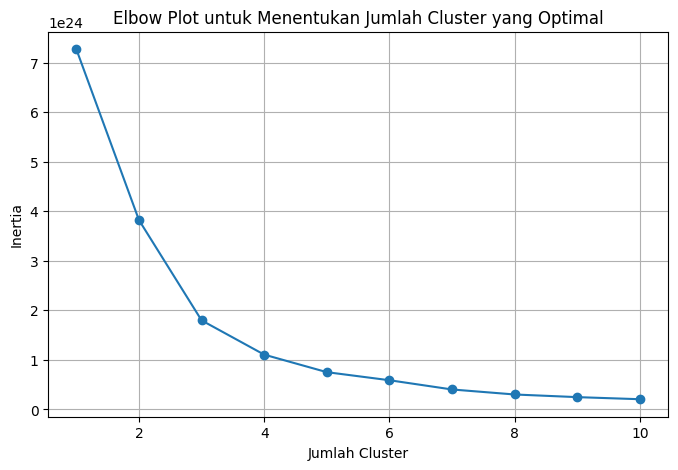

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Menambahkan magic command untuk Jupyter Notebook
%matplotlib inline


# Pilih fitur yang relevan untuk klastering
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(1, 11))

# Menjalankan K-Means untuk setiap jumlah cluster dan menyimpan inertia
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Membuat elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot untuk Menentukan Jumlah Cluster yang Optimal')
plt.grid(True)
plt.show()

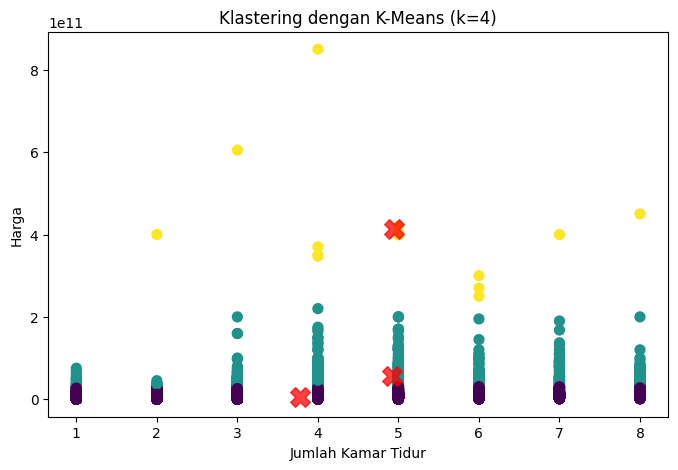

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menjalankan K-Means dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan K-Means (k=4)')
plt.show()


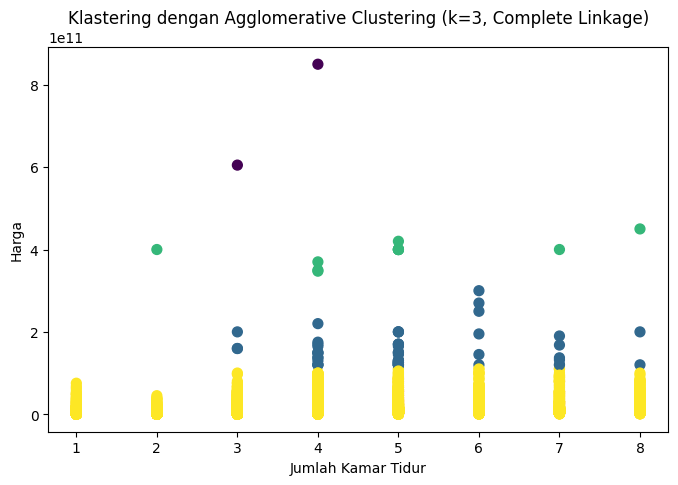

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Pilih fitur yang relevan untuk klastering
# Pastikan variabel data sudah didefinisikan sebelumnya
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menjalankan Agglomerative Clustering dengan jumlah cluster = 3 dan complete linkage
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglomerative.fit_predict(X)

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan Agglomerative Clustering (k=3, Complete Linkage)')
plt.show()

In [106]:
# Mendapatkan label cluster untuk setiap data point
data['cluster'] = labels

# Menghitung rata-rata harga untuk setiap cluster
cluster_avg_price = data.groupby('cluster')['price'].mean()

# Menemukan cluster dengan harga rata-rata terendah
lowest_price_cluster = cluster_avg_price.idxmin()

# Mengambil data dari cluster dengan harga terendah
lowest_price_cluster_data = data[data['cluster'] == lowest_price_cluster]

print("Cluster dengan harga rata-rata terendah:")
print(lowest_price_cluster_data)

Cluster dengan harga rata-rata terendah:
              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
2        3500000000           201       113       3.0          4        1   
3       38000000000           600      1028       5.0          4        4   
5         775000000           110        45       3.0          3        1   
13       1300000000           140        70       3.0          2        0   
34      49000000000           429       490       3.0          3        4   
...             ...           ...       ...       ...        ...      ...   
217331  90000000000           800      1125       4.0          4        0   
217332  46000000000           544       886       4.0          4        0   
217351   7000000000           450       312       4.0          3        2   
217370  30450000000           450       783       6.0          4        2   
217372  60000000000          1200       717       6.0          4        6   

       province           city    

C:\Users\ANITA\AppData\Local\Temp\ipykernel_25604\95737414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [107]:
lowest_price_cluster_data.to_csv('data_properti_filtered.csv', index=False)